Load the preprocessed data

In [19]:
import pandas as pd

df = pd.read_csv('../../data/preprocessed_data_with_resampling.csv')
# Get the number of instances (rows) in your DataFrame
num_instances = df.shape[0]

# Print the number of instances
print(f"Number of instances: {num_instances}")

Number of instances: 113590


Numerical Features

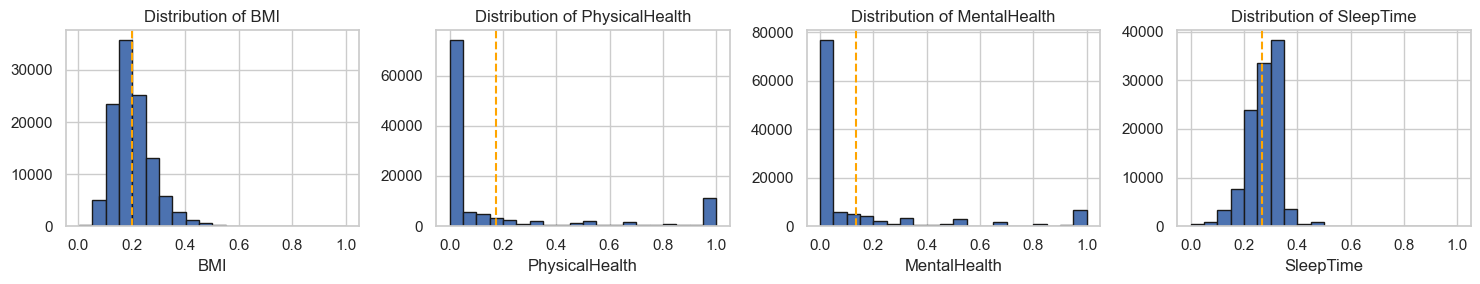

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 3))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i + 1)
    plt.hist(df[feature], bins=20, edgecolor='k')
    plt.axvline(df[feature].mean(), color='orange', linestyle='dashed', label='Mean')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Categorical Features

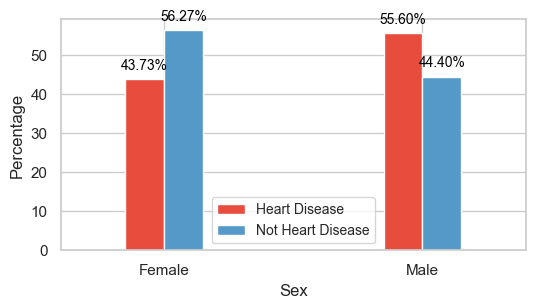

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of Heart Disease and Not Heart Disease for each sex
percentage_data = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack().fillna(0)
percentage_data['Total'] = percentage_data[0] + percentage_data[1]
percentage_data['Heart Disease'] = (percentage_data[1] / percentage_data['Total']) * 100
percentage_data['Not Heart Disease'] = (percentage_data[0] / percentage_data['Total']) * 100

# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 3))
percentage_data[['Heart Disease', 'Not Heart Disease']].plot(kind='bar', ax=ax, width=0.3, color=['#E74C3C','#5499C7'])

# Set labels and title
ax.set_xticklabels(["Female", "Male"], rotation=0)
ax.set_xlabel("Sex")
ax.set_ylabel("Percentage")

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Set the legend font size
ax.legend(fontsize=10)

# Show the plot
plt.show()
